In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import ydata_profiling

# Exploration des données 

In [38]:
df = pd.read_csv("Expresso_churn_dataset.csv")
print(df['CHURN'].value_counts())


CHURN
0    1750062
1     403986
Name: count, dtype: int64


In [39]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [41]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,2154048,2154048,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION,1304749,14,DAKAR,513271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TENURE,2154048,8,K > 24 month,2043201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTANT,1397309.0,NaN,NaN,NaN,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,NaN,NaN,NaN,11.52912,13.27407,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,NaN,NaN,NaN,5510.810334,7187.11288,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,NaN,NaN,NaN,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,NaN,NaN,NaN,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,NaN,NaN,NaN,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,NaN,NaN,NaN,277.68914,872.688909,0.0,5.0,27.0,156.0,50809.0


In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df,title="Rapport Expresso", explorative = True)
profile.to_file("rapport_profiling_Expresso.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\BAN CYRILLE\MonDossier\envs\profilenv\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x00000278DD245E70, file "C:\Users\BAN CYRILLE\MonDossier\envs\profilenv\lib\site-packages\ydata_profiling\model\pandas\correlations_pandas.py", line 164>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
df.isnull().mean()*100

user_id            0.000000
REGION            39.428044
TENURE             0.000000
MONTANT           35.131018
FREQUENCE_RECH    35.131018
REVENUE           33.706213
ARPU_SEGMENT      33.706213
FREQUENCE         33.706213
DATA_VOLUME       49.229776
ON_NET            36.520774
ORANGE            41.561191
TIGO              59.887988
ZONE1             92.120835
ZONE2             93.648052
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.902223
FREQ_TOP_PACK     41.902223
CHURN              0.000000
dtype: float64

# Normalisation des valeurs manquantes 

In [ ]:
Disons ici que les variables qui ont plus de 50 % et moins pertinentes seront supprimés , tels que TIGO , ZONE1 , ZONE2 , pour le reste nous utiliserons
la mediane afin de pourvoir remplacer les valeurs manquantes et se rapprocher de valeurs correctes .

In [43]:
df = df.loc[:,df.isnull().mean()*100 < 50] # Suppression des colonnes TIGO , ZONE1 , ZONE2 .

In [44]:
df.isnull().mean()*100

user_id            0.000000
REGION            39.428044
TENURE             0.000000
MONTANT           35.131018
FREQUENCE_RECH    35.131018
REVENUE           33.706213
ARPU_SEGMENT      33.706213
FREQUENCE         33.706213
DATA_VOLUME       49.229776
ON_NET            36.520774
ORANGE            41.561191
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.902223
FREQ_TOP_PACK     41.902223
CHURN              0.000000
dtype: float64

In [ ]:
# Nous allons donc remplacer les valeurs numeriques par la mediane et les valeurs catégorielles par le mode 

In [45]:
nums_col = df.select_dtypes(include="number").columns
df.loc[:, nums_col] = df[nums_col].fillna(df[nums_col].median())

cats_col = df.select_dtypes(include="object").columns
df.loc[:, cats_col] = df[cats_col].fillna(df[cats_col].mode().iloc[0])


In [46]:
df.isnull().mean()*100

user_id           0.0
REGION            0.0
TENURE            0.0
MONTANT           0.0
FREQUENCE_RECH    0.0
REVENUE           0.0
ARPU_SEGMENT      0.0
FREQUENCE         0.0
DATA_VOLUME       0.0
ON_NET            0.0
ORANGE            0.0
MRG               0.0
REGULARITY        0.0
TOP_PACK          0.0
FREQ_TOP_PACK     0.0
CHURN             0.0
dtype: float64

In [ ]:
# Detection des valeurs abérantes 

In [47]:
nums_cols = df.select_dtypes(include="number").columns

for col in nums_cols :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    seuil_inf = Q1 - 1.5*IQR
    seuil_sup = Q3 + 1.5*IQR

    outliers = df[(df[col]<seuil_inf)|(df[col]>seuil_sup)]
    print( f"{col}: {len(outliers)} valeurs abérantes detectés ")

MONTANT: 289031 valeurs abérantes detectés 
FREQUENCE_RECH: 265424 valeurs abérantes detectés 
REVENUE: 286007 valeurs abérantes detectés 
ARPU_SEGMENT: 285787 valeurs abérantes detectés 
FREQUENCE: 278779 valeurs abérantes detectés 
DATA_VOLUME: 1026800 valeurs abérantes detectés 
ON_NET: 389967 valeurs abérantes detectés 
ORANGE: 390257 valeurs abérantes detectés 
REGULARITY: 0 valeurs abérantes detectés 
FREQ_TOP_PACK: 385157 valeurs abérantes detectés 
CHURN: 403986 valeurs abérantes detectés 


In [48]:
import pandas as pd

# Exemple : suppose que df est ton DataFrame
outlier_percentages = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Nombre d'outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    proportion = len(outliers) / len(df) * 100

    outlier_percentages[col] = round(proportion, 2)

# Convertir en DataFrame pour affichage clair
outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier %'])
outlier_df.sort_values(by='Outlier %', ascending=False, inplace=True)

print(outlier_df)


                Outlier %
DATA_VOLUME         47.67
CHURN               18.75
ORANGE              18.12
ON_NET              18.10
FREQ_TOP_PACK       17.88
MONTANT             13.42
REVENUE             13.28
ARPU_SEGMENT        13.27
FREQUENCE           12.94
FREQUENCE_RECH      12.32
REGULARITY           0.00


In [ ]:
Nous essayerons de voir l'etalage des outliers dans les differentes distributions 

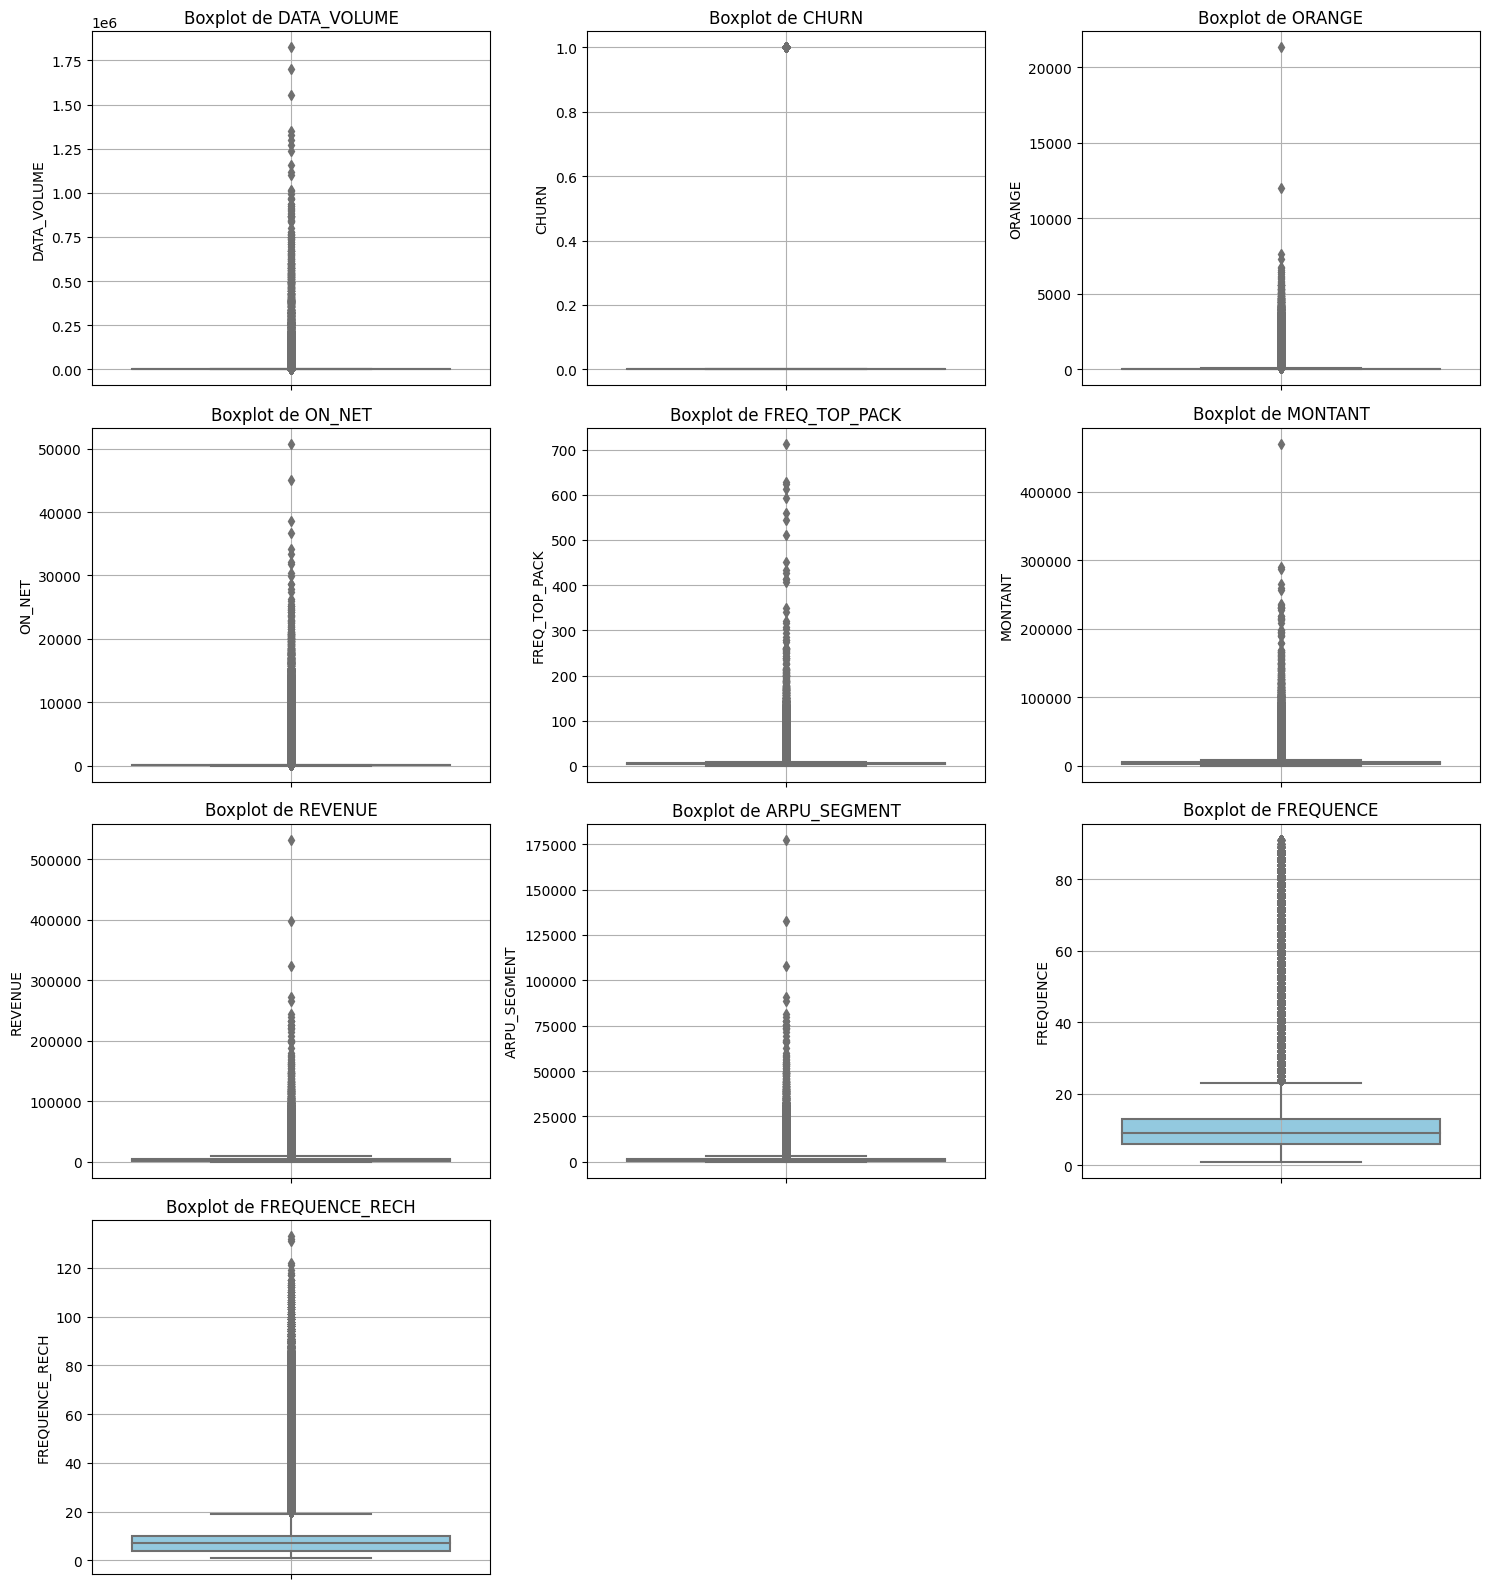

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables à tracer
colonnes = ["DATA_VOLUME", "CHURN", "ORANGE", "ON_NET", "FREQ_TOP_PACK",
            "MONTANT", "REVENUE", "ARPU_SEGMENT", "FREQUENCE", "FREQUENCE_RECH"]

# Définir la grille des sous-graphiques
n = len(colonnes)
n_cols = 3  # 3 colonnes par ligne
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(colonnes, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot de {col}")
    plt.xlabel("")  # Pas besoin de label horizontal
    plt.grid(True)

plt.tight_layout()
plt.show()


In [31]:
La majorité des outliers etant proches des bornes , nous allons utilisés la winsorization 

SyntaxError: invalid syntax (348059712.py, line 1)

In [49]:
def winsorize_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remplacement
    df.loc[:, col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


# Exemple d'application sur toutes les colonnes
colonnes = ["DATA_VOLUME", "ORANGE", "ON_NET", "FREQ_TOP_PACK",
            "MONTANT", "REVENUE", "ARPU_SEGMENT", "FREQUENCE", "FREQUENCE_RECH"]

for col in colonnes:
    winsorize_iqr(df, col)


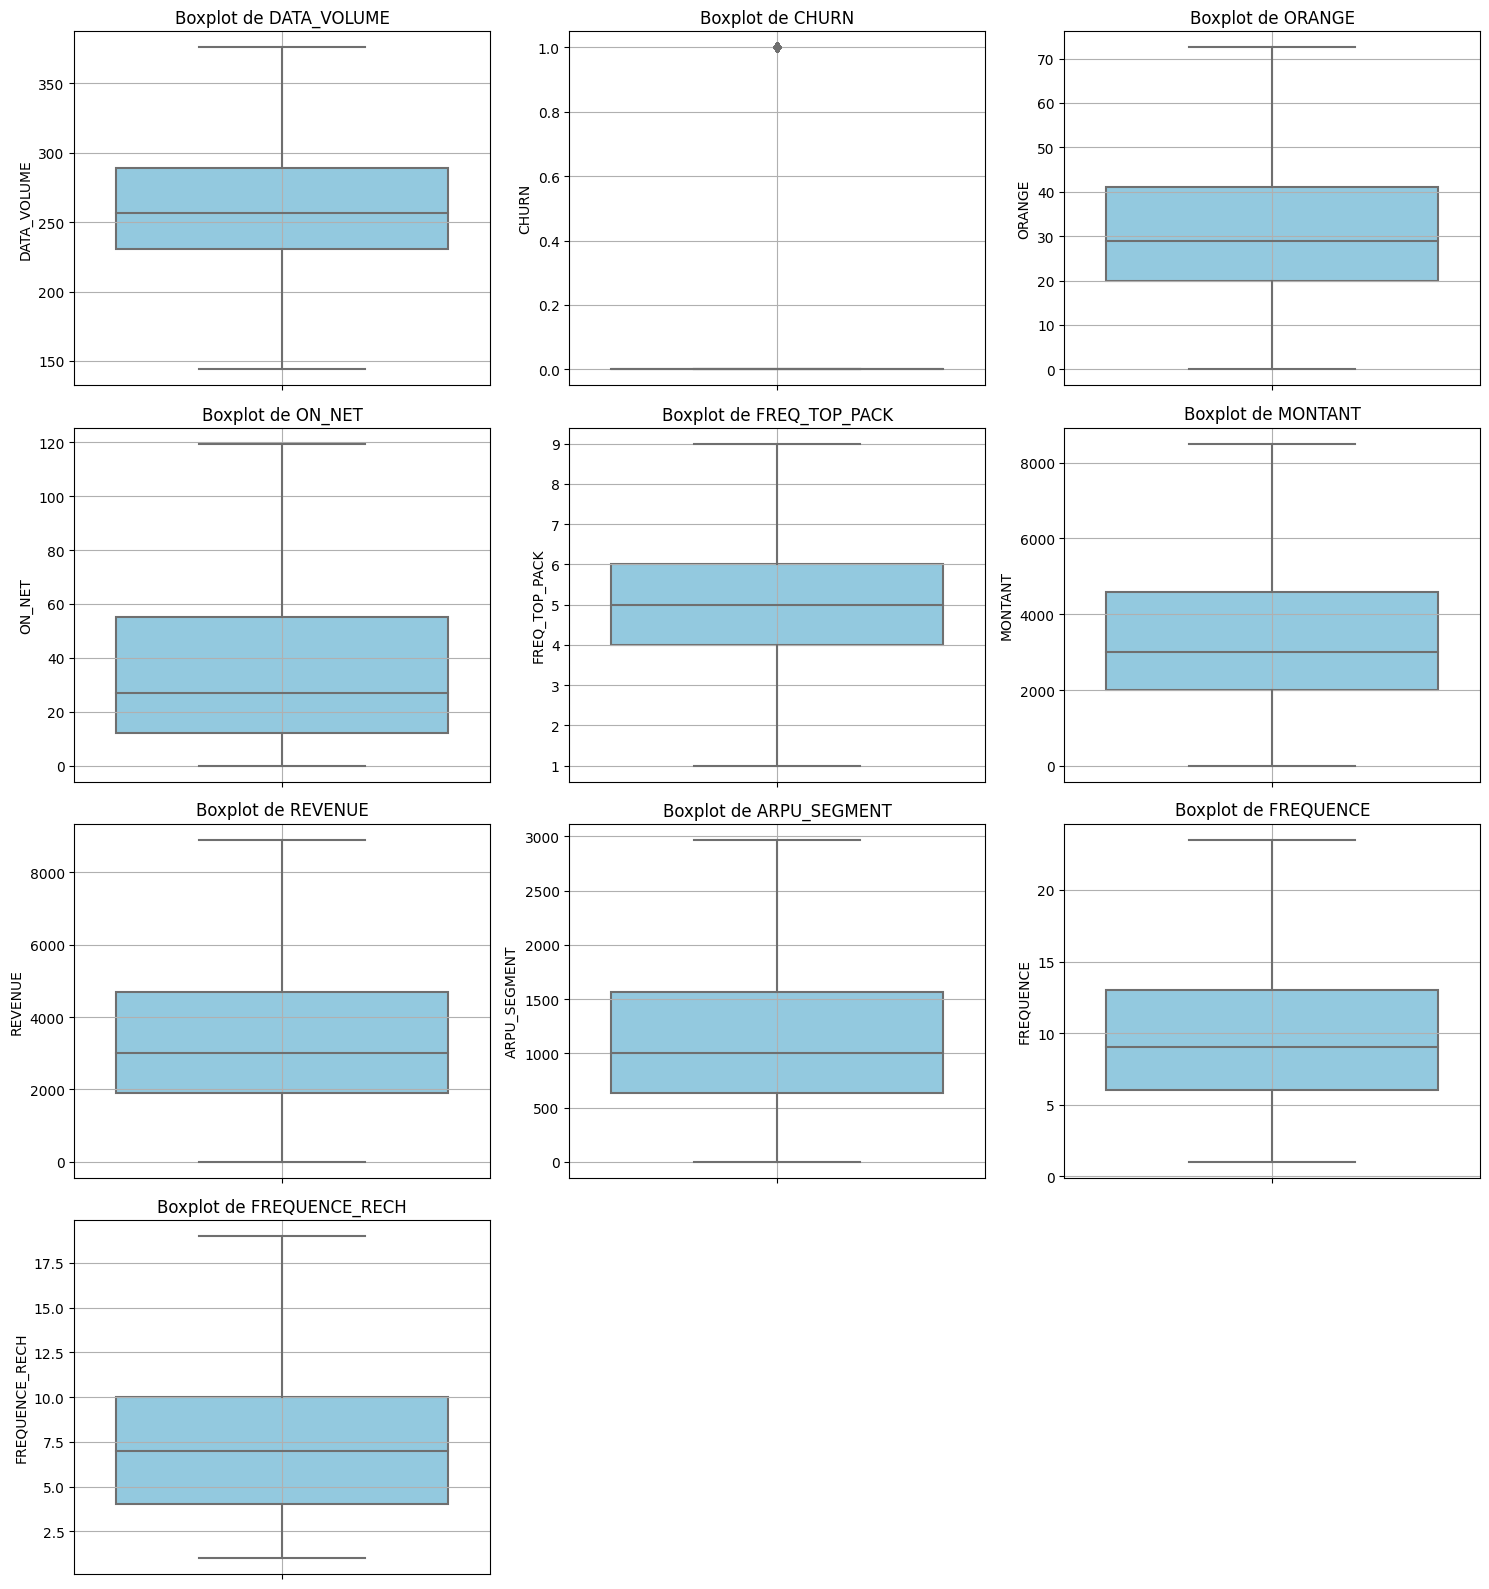

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables à tracer
colonnes = ["DATA_VOLUME", "CHURN", "ORANGE", "ON_NET", "FREQ_TOP_PACK",
            "MONTANT", "REVENUE", "ARPU_SEGMENT", "FREQUENCE", "FREQUENCE_RECH"]

# Définir la grille des sous-graphiques
n = len(colonnes)
n_cols = 3  # 3 colonnes par ligne
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(colonnes, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot de {col}")
    plt.xlabel("")  # Pas besoin de label horizontal
    plt.grid(True)

plt.tight_layout()
plt.show()


In [51]:
print(df['CHURN'].value_counts())

CHURN
0    1750062
1     403986
Name: count, dtype: int64


In [52]:
col_cat = df.select_dtypes(include="object").columns.tolist()
print(col_cat)

['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']


In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in col_cat:
    df.loc[:, col] = le.fit_transform(df[col].astype(str))

In [ ]:
# Nous allons passer à l'étape de la formation du classificateur automatique 

In [54]:
X = df.drop(columns=["CHURN"])
y = df['CHURN']

In [ ]:
# Separation des données

In [26]:
import pandas as pd

# Afficher les classes de y
print("Voici la répartition des classes dans y :")
print(pd.Series(y).value_counts())


Voici la répartition des classes dans y :
CHURN
0.0    2154048
Name: count, dtype: int64


In [27]:
print(df['CHURN'].value_counts())


CHURN
0.0    2154048
Name: count, dtype: int64


In [55]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Application de SMOTE uniquement sur les données d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [60]:
print(X_train.columns.tolist())

['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK']


In [ ]:
# Entrainement du modèle

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42,n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [58]:
import pickle

# Sauvegarde du modèle entraîné dans un fichier
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [59]:
import pickle

# Sauvegarder le modèle RandomForestClassifier
with open("modele_churn.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
# Evaluation du modèle

In [57]:
from sklearn.metrics import classification_report , confusion_matrix 

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91    350013
           1       0.60      0.51      0.55     80797

    accuracy                           0.84    430810
   macro avg       0.75      0.72      0.73    430810
weighted avg       0.84      0.84      0.84    430810

[[322684  27329]
 [ 39571  41226]]


In [61]:
import pickle

# Entraînement du modèle (si pas déjà fait)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Sauvegarde du modèle
with open("modele_churn.pkl", "wb") as f:
    pickle.dump(model, f)

# Sauvegarde des noms de colonnes utilisées pour l'entraînement
with open("colonnes_churn.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)
